# Classic Image Compression
In this notebook we show a simple way of image compression using bit removal and bit plane 

## Importing necessary libraries:

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

## Let's load the image:

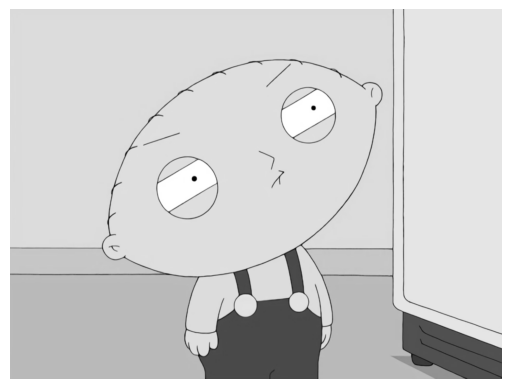

In [3]:
img = cv2.imread("stewie.png", cv2.IMREAD_GRAYSCALE)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis(False)
plt.show()

## Two bit removal:

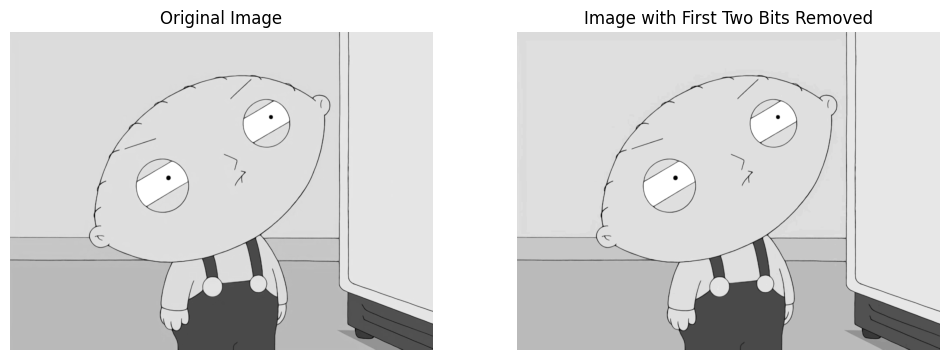

True

In [4]:
bit_mask = 0b11111100
compressed_image = cv2.bitwise_and(img, bit_mask)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(compressed_image, cmap='gray')
plt.title('Image with First Two Bits Removed')
plt.axis('off')

plt.show()

cv2.imwrite("compressed-stewie.png", compressed_image)

## Two Bit Size comprarison:

In [5]:
current_folder = os.getcwd()

image_path = os.path.join(current_folder, 'stewie.png')
file_size = os.path.getsize(image_path) / 1024

compressed_image_path = os.path.join(current_folder, 'compressed-stewie.png')
compressed_file_size = os.path.getsize(compressed_image_path) / 1024

print(f"Original File size:    {file_size:.2f} KB")
print(f"Compressed File size:   {compressed_file_size:.2f} KB")

Original File size:    146.88 KB
Compressed File size:   85.57 KB


## 1 Bit to 7 Bit removal:

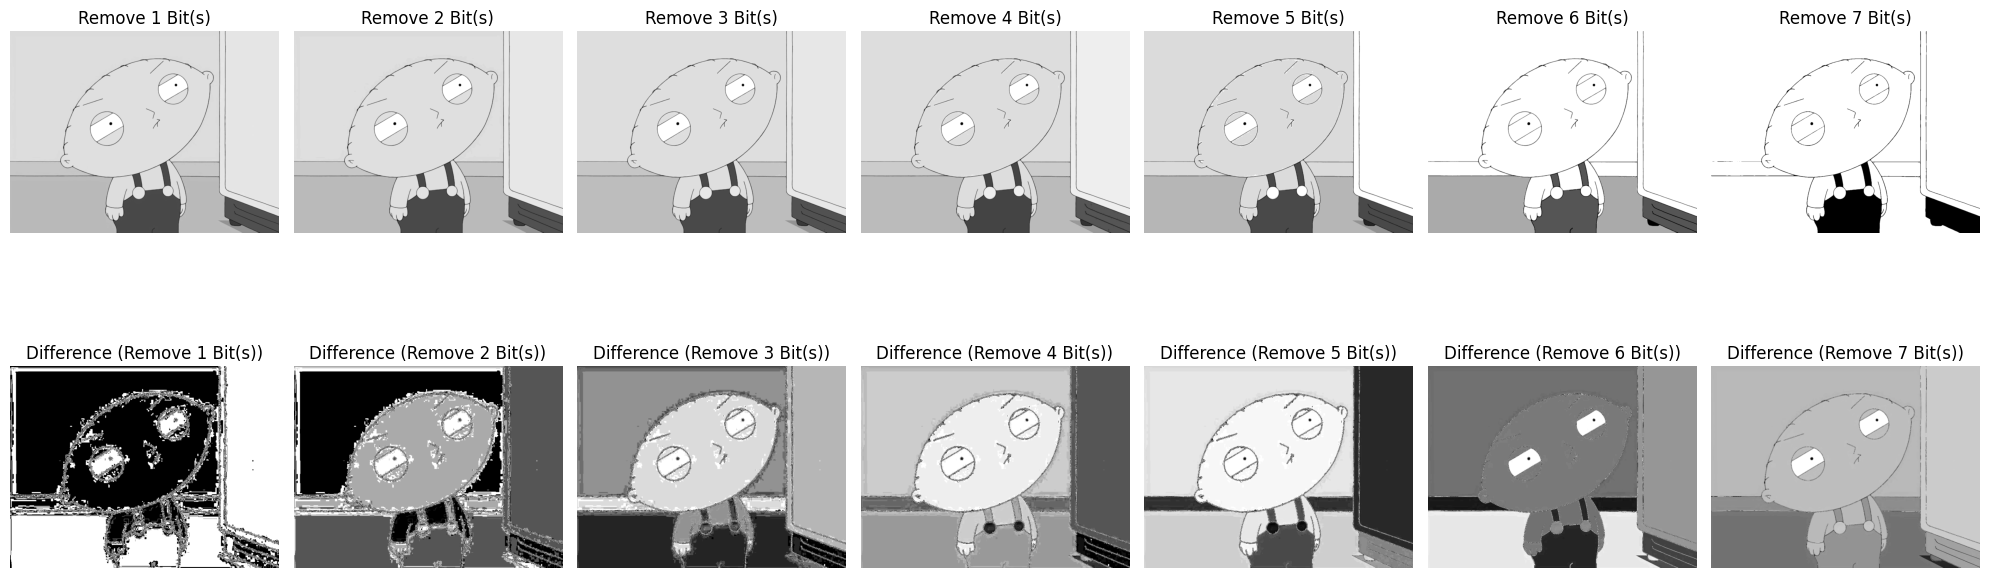

In [8]:
fig, axs = plt.subplots(2, 7, figsize=(20, 8))

for i in range(1, 8):
    bit_mask = 0xFF & (0xFF << i)
    
    compressed_image = cv2.bitwise_and(img, bit_mask)
    difference_image = cv2.absdiff(img, compressed_image)

    axs[0, i-1].imshow(compressed_image, cmap='gray')
    axs[0, i-1].set_title(f'Remove {i} Bit(s)')
    axs[0, i-1].axis('off')

    axs[1, i-1].imshow(difference_image, cmap='gray')
    axs[1, i-1].set_title(f'Difference (Remove {i} Bit(s))')
    axs[1, i-1].axis('off')

    cv2.imwrite(f"compressed-stewie-{i}bits.png", compressed_image)

plt.tight_layout()
plt.show()


## Final size comparison:

In [9]:
current_folder = os.getcwd()

image_path = os.path.join(current_folder, 'stewie.png')
file_size = os.path.getsize(image_path) / 1024

print(f"Original File size:           {file_size:.2f} KB")

for i in range(1, 8):
    
    compressed_image_path = os.path.join(current_folder, f'compressed-stewie-{i}bits.png')
    compressed_file_size = os.path.getsize(compressed_image_path) / 1024
    print(f"{i} Bit Compressed File size:   {compressed_file_size:.2f} KB")

Original File size:           146.88 KB
1 Bit Compressed File size:   111.88 KB
2 Bit Compressed File size:   85.57 KB
3 Bit Compressed File size:   60.26 KB
4 Bit Compressed File size:   48.07 KB
5 Bit Compressed File size:   38.87 KB
6 Bit Compressed File size:   27.74 KB
7 Bit Compressed File size:   18.97 KB
